In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator, math, statistics
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("futbol.csv", parse_dates= True, index_col= 1)

In [3]:
dataset = np.array(df.filter(["Nationality","Club","Overall","Potential","Value","Wage"]).values)

In [4]:
dataset

array([['Argentina', 'FC Barcelona', 94, 94, '€110.5M', '€565K'],
       ['Portugal', 'Juventus', 94, 94, '€77M', '€405K'],
       ['Brazil', 'Paris Saint-Germain', 92, 93, '€118.5M', '€290K'],
       ...,
       ['England', 'Cambridge United', 47, 67, '€60K', '€1K'],
       ['England', 'Tranmere Rovers', 47, 66, '€60K', '€1K'],
       ['England', 'Tranmere Rovers', 46, 66, '€60K', '€1K']],
      dtype=object)

In [5]:
unique, counts = np.unique(dataset[:,0], return_counts=True)
diccionario = dict(zip(unique, counts))

In [6]:
#Creación de variables usadas para el marco de datos normalizedDataset
robustCount = MinMaxScaler().fit_transform(np.array(list(diccionario.values())).reshape(-1,1)).flat[:]
robustCountNormalized = (((robustCount - min(robustCount).reshape(-1,1))).flat[:])

mean = [statistics.geometric_mean(df[df["Nationality"]==pais]["Overall"])for pais in list(diccionario.keys())]
robustMean = (MinMaxScaler().fit_transform(np.array(mean).reshape(-1,1))).flat[:]
robustMeanNormalized = (robustMean - min(robustMean).reshape(-1,1)).flat[:]

In [7]:
#Creación del mejor país simulado
target = max(robustCountNormalized), max(robustMeanNormalized)
target

(1.0, 1.0)

In [8]:
normalizedDataset = pd.DataFrame(data={'Nationality':list(diccionario.keys()), 'Count': diccionario.values(),
                         "Mean": mean, 'RobustCount': robustCount, 'RobustMean': robustMean,
                      'RobustCountNormalized': robustCountNormalized,'RobustMeanNormalized': robustMeanNormalized
                                      })

In [9]:
#Agregando columna de distancias a normalizedDataset
normalizedDataset = normalizedDataset.assign(Distance=[math.sqrt((target[0]-row['RobustCountNormalized'])**2+
                                    (target[1]-row["RobustMeanNormalized"])**2)
                                    for index,row in normalizedDataset.iterrows()])

## Reglas

- Si tiene misma cantidad de jugador, entonces:
- Si tiene mayor promedio, entonces subir
- Si no, entonces bajar
- Si no son iguales:
- Si es mayor en cantidad y mayor en promedio, entonces: 
- Subir posición
- Si es mayor en cantidad y menor en promedio, entonces
- calcular diferencia de promedio con diferencia con jugadores

In [10]:
#Nueva columna para evaluar a los países
# normalizedDataset = normalizedDataset.assign(Distance=[math.sqrt((target[0]-row['RobustCountNormalized'])**2+
#                                     (target[1]-row["RobustMeanNormalized"])**2)
#                                     for index,row in normalizedDataset.iterrows()])

In [191]:
statistics.geometric_mean([.000001,.000001])

1.0000000000000004e-06

In [187]:
[[x[0],x[1]] for x in zip(normalizedDataset['RobustCountNormalized'], normalizedDataset['RobustMeanNormalized'])]

[[0.001806140878988561, 0.2371191558555119],
 [0.023479831426851294, 0.45921933102047285],
 [0.03552077062010837, 0.6863398191266588],
 [0.0, 0.28571428571428514],
 [0.00842865743527995, 0.543473637410985],
 [0.001806140878988561, 0.30310408907293507],
 [0.5635159542444311, 0.5854357222887971],
 [0.005418422636965683, 0.609817418851307],
 [0.14148103552077063, 0.3031544450443704],
 [0.17880794701986755, 0.410710855670374],
 [0.002408187838651415, 0.32387864821922374],
 [0.0012040939193257074, 0.3468418641772173],
 [0.001806140878988561, 0.6756800904948634],
 [0.1559301625526791, 0.5949700554257311],
 [0.0, 0.1904761904761889],
 [0.00842865743527995, 0.5397484869270457],
 [0.0006020469596628537, 0.49561099350171256],
 [0.017459361830222755, 0.4528659560977699],
 [0.036122817579771226, 0.5877956302401324],
 [0.0, 0.0],
 [0.49729078868151716, 0.7158488559225384],
 [0.018663455749548464, 0.4132618156399577],
 [0.009030704394942805, 0.5904117143161707],
 [0.0012040939193257074, 0.2734281228

In [192]:
normalizedDataset = normalizedDataset.assign(GeometricMean=[statistics.geometric_mean([x[0]+.0000001,x[1]+.0000001])
                for x in zip(normalizedDataset['RobustCountNormalized'], normalizedDataset['RobustMeanNormalized'])])

In [208]:
normalizedDataset.sort_values('GeometricMean',ascending=True).head(n=60)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance,GeometricMean
74,Indonesia,1,56.000000,0.000000,0.000000,0.000000,0.000000,1.414214,0.000001
19,Botswana,1,56.000000,0.000000,0.000000,0.000000,0.000000,1.414214,0.000001
138,South Sudan,1,60.000000,0.000000,0.190476,0.000000,0.190476,1.286596,0.000436
14,Belize,1,60.000000,0.000000,0.190476,0.000000,0.190476,1.286596,0.000436
98,Malta,1,61.000000,0.000000,0.238095,0.000000,0.238095,1.257179,0.000488
3,Andorra,1,62.000000,0.000000,0.285714,0.000000,0.285714,1.228904,0.000535
125,Qatar,1,63.000000,0.000000,0.333333,0.000000,0.333333,1.201850,0.000577
124,Puerto Rico,1,63.000000,0.000000,0.333333,0.000000,0.333333,1.201850,0.000577
129,Rwanda,1,63.000000,0.000000,0.333333,0.000000,0.333333,1.201850,0.000577
82,Jordan,1,63.000000,0.000000,0.333333,0.000000,0.333333,1.201850,0.000577


In [198]:
normalizedDataset.sort_values('Distance',ascending=True).head(n=60)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance,GeometricMean
139,Spain,1072,69.399849,0.644792,0.638088,0.644792,0.638088,0.507102,0.641432
20,Brazil,827,71.032826,0.497291,0.715849,0.497291,0.715849,0.577459,0.596646
6,Argentina,937,68.294150,0.563516,0.585436,0.563516,0.585436,0.601982,0.574372
59,Germany,1198,65.758510,0.720650,0.464691,0.720650,0.464691,0.603815,0.578689
55,France,914,67.438628,0.549669,0.544697,0.549669,0.544697,0.640390,0.547178
46,England,1662,63.067219,1.000000,0.336534,1.000000,0.336534,0.663466,0.580117
78,Italy,702,67.842462,0.422035,0.563927,0.422035,0.563927,0.724019,0.487850
31,Colombia,618,65.263305,0.371463,0.441110,0.371463,0.441110,0.841081,0.404792
123,Portugal,322,71.137432,0.193257,0.720830,0.193257,0.720830,0.853680,0.373238
108,Netherlands,453,67.383009,0.272125,0.542048,0.272125,0.542048,0.859954,0.384065


In [81]:
subsets = [pd.DataFrame(data = normalizedDataset[normalizedDataset['Count']==x].sort_values('Mean', ascending=True)) for x in conjunto]
subsets[0]

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
19,Botswana,1,56.0,0.0,0.000000,0.0,0.000000,1.414214
74,Indonesia,1,56.0,0.0,0.000000,0.0,0.000000,1.414214
14,Belize,1,60.0,0.0,0.190476,0.0,0.190476,1.286596
138,South Sudan,1,60.0,0.0,0.190476,0.0,0.190476,1.286596
98,Malta,1,61.0,0.0,0.238095,0.0,0.238095,1.257179
3,Andorra,1,62.0,0.0,0.285714,0.0,0.285714,1.228904
62,Grenada,1,63.0,0.0,0.333333,0.0,0.333333,1.201850
82,Jordan,1,63.0,0.0,0.333333,0.0,0.333333,1.201850
129,Rwanda,1,63.0,0.0,0.333333,0.0,0.333333,1.201850
125,Qatar,1,63.0,0.0,0.333333,0.0,0.333333,1.201850


In [158]:
type(subsets)

list

In [144]:
subsets[2].sort_values('Mean', ascending=True)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
67,Guyana,3,61.571007,0.001204,0.265286,0.001204,0.265286,1.239918
140,St Kitts Nevis,3,61.673623,0.001204,0.270173,0.001204,0.270173,1.237029
23,Burundi,3,61.741991,0.001204,0.273428,0.001204,0.273428,1.235111
112,Niger,3,62.039863,0.001204,0.287613,0.001204,0.287613,1.226821
142,Sudan,3,62.632784,0.001204,0.315847,0.001204,0.315847,1.210644
11,Barbados,3,63.283679,0.001204,0.346842,0.001204,0.346842,1.193402
64,Guatemala,3,63.525792,0.001204,0.358371,0.001204,0.358371,1.187131
93,Liechtenstein,3,64.400966,0.001204,0.400046,0.001204,0.400046,1.165134
107,Namibia,3,65.994949,0.001204,0.475950,0.001204,0.475950,1.127928
148,Tanzania,3,66.708618,0.001204,0.509934,0.001204,0.509934,1.112546


In [145]:
subsets[3].sort_values('Mean', ascending=True)

,Nationality,Count,Mean,RobustCount,RobustMean,RobustCountNormalized,RobustMeanNormalized,Distance
0,Afghanistan,4,60.979502,0.001806,0.237119,0.001806,0.237119,1.256335
5,Antigua & Barbuda,4,62.365186,0.001806,0.303104,0.001806,0.303104,1.217397
99,Mauritania,4,64.467042,0.001806,0.403192,0.001806,0.403192,1.163001
83,Kazakhstan,4,64.706256,0.001806,0.414584,0.001806,0.414584,1.157196
104,Montserrat,4,64.733214,0.001806,0.415867,0.001806,0.415867,1.156547
85,Korea DPR,4,65.317139,0.001806,0.443673,0.001806,0.443673,1.142756
36,Cuba,4,65.736214,0.001806,0.463629,0.001806,0.463629,1.133175
151,Trinidad & Tobago,4,66.196839,0.001806,0.485564,0.001806,0.485564,1.122958
143,Suriname,4,66.974200,0.001806,0.522581,0.001806,0.522581,1.106490
92,Libya,4,69.974680,0.001806,0.665461,0.001806,0.665461,1.052762


In [155]:
nuevoSub = pd.concat([pd.DataFrame(data = normalizedDataset[normalizedDataset['Count']==x]
                .sort_values('Mean', ascending=True)) for x in conjunto])
nuevoNuevo = nuevoSub.sort_values('Count', ascending=False)

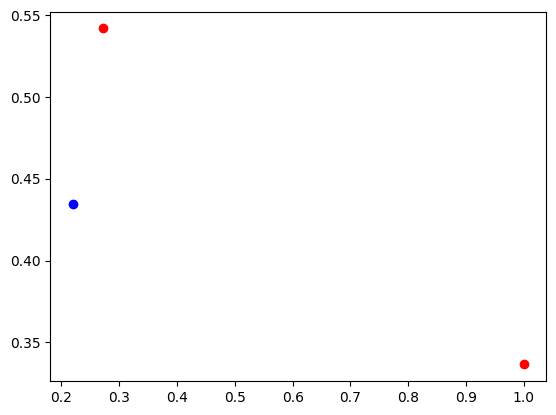

In [132]:
# plt.scatter(nuevoSub[nuevoSub['Nationality']=='Republic of Ireland']['RobustCountNormalized'],
#             nuevoSub[nuevoSub['Nationality']=='Republic of Ireland']['RobustMeanNormalized'], color='r')
plt.scatter(nuevoSub[nuevoSub['Nationality']=='Mexico']['RobustCountNormalized'],
            nuevoSub[nuevoSub['Nationality']=='Mexico']['RobustMeanNormalized'], color='b')
plt.scatter(nuevoSub[nuevoSub['Nationality']=='Netherlands']['RobustCountNormalized'],
            nuevoSub[nuevoSub['Nationality']=='Netherlands']['RobustMeanNormalized'], color='r')
plt.scatter(nuevoSub[nuevoSub['Nationality']=='England']['RobustCountNormalized'],
            nuevoSub[nuevoSub['Nationality']=='England']['RobustMeanNormalized'], color='r')
plt.show()

In [16]:
#Posibles reglas difusas
# Si ambos son 0, entonces mal/peor caso
#Si promedio 0, mal caso o validar por cantidad
#Si cantidad 0, mal caso o validar por promedio
#Si cantidad mayor que promedio, bueno
#Si promedio mayor que cantidad 

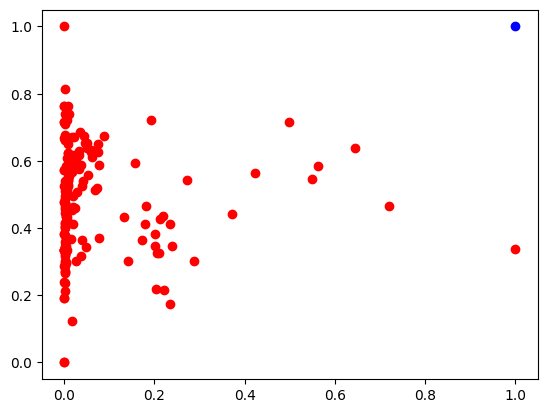

In [201]:
plt.scatter(normalizedDataset["RobustCountNormalized"].values, normalizedDataset["RobustMeanNormalized"].values, color='r')
plt.scatter(target[0], target[1], color='b')

plt.show()